In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_csv( 'heart.csv',header='infer' )
data.columns = ['age','sex','cp','bp','cholesterol','blood sugar','ecg','heart rate','angina',
               'oldpeak','slope','major vessels','thal','heart attack']
data

,age,sex,cp,bp,cholesterol,blood sugar,ecg,heart rate,angina,oldpeak,slope,major vessels,thal,heart attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
y = data['heart attack']
X = data.drop(columns=['heart attack'])

# Standardize the X values

import math
import numpy as np

def myMean(vec):
    col_means = np.zeros(vec.shape[1])
    for col_number in range (vec.shape[1]):
        col_means[col_number] = sum(vec[:,col_number])/len(vec[:,col_number])
    
    return col_means
def myStdDev(vec):
    avg = myMean(vec)
    col_stdevs = np.zeros(vec.shape[1])
    for col_number in range (vec.shape[1]):
        sum_of_square = sum((vec[i,col_number] - avg[col_number])**2 for i in range(vec.shape[0]))
        col_stdevs[col_number] = math.sqrt(sum_of_square/(len(vec[:,col_number])-1))
    return col_stdevs
def calc_Mean_Stdev(arr):
    mean_values = np.zeros( arr.shape[1] )
    stdDev_values = np.zeros( arr.shape[1] )

    mean_values = myMean(arr) 
    stdDev_values = myStdDev(arr)
    
    return(mean_values, stdDev_values)

def standardize(arr):
    avg = myMean(arr)
    stdev = myStdDev(arr)
    standardized_array = arr 
    for col_number in range (arr.shape[1]):
        for i in range(arr.shape[0]):
            standardized_array[i,col_number] = (arr[i,col_number] - avg[col_number])/stdev[col_number]
    return standardized_array

X = standardize(X.values)


print('After standardization:')
pd.DataFrame(X).head()

After standardization:


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.950624,0.679881,1.969864,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324
1,-1.912150,0.679881,1.000921,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075
2,-1.471723,-1.465992,0.031978,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075
3,0.179877,0.679881,0.031978,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075
4,0.289984,-1.465992,-0.936965,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075


In [36]:
print('Class distribution:')
y.value_counts()

Class distribution:


1    165
0    138
Name: heart attack, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('Class distribution in training set:')
print(Y_train.value_counts())

print('\nClass distribution in test set:')
print(Y_test.value_counts())

Class distribution in training set:
1    131
0    111
Name: heart attack, dtype: int64

Class distribution in test set:
1    34
0    27
Name: heart attack, dtype: int64


In [38]:
#mandatory import 
from sklearn.model_selection import cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC, LinearSVC


from sklearn.feature_selection import RFE

In [39]:
pre = {}
rec = {}
fs = {}
acc = {}
auc = {}


def clear_metrics(): 
    pre.clear()
    rec.clear()
    fs.clear()
    acc.clear()
    auc.clear()

In [40]:
def allscore(scores, model):
    acc[model]= scores['test_accuracy'].mean()
    fs[model]= scores['test_f1'].mean()
    pre[model]=scores['test_precision'].mean()
    rec[model]=scores['test_recall'].mean()
    auc[model]= scores['test_roc_auc'].mean()
    print("Accuracy: %0.4f   (+/- %0.4f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
    print("Precision: %0.4f   (+/- %0.4f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
    print("Recall: %0.4f   (+/- %0.4f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))
    print("F-1 Score: %0.4f   (+/- %0.4f)" % (scores['test_f1'].mean(), scores['test_f1'].std() * 2))
    print("ROC-AUC: %0.4f   (+/- %0.4f)" % (scores['test_roc_auc'].mean(), scores['test_roc_auc'].std() * 2))

In [41]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for Random Forest:   ')
allscore(scores, "Random Forest")

Classification Report for Random Forest:   
Accuracy: 0.8316   (+/- 0.1052)
Precision: 0.8311   (+/- 0.1540)
Recall: 0.8779   (+/- 0.1571)
F-1 Score: 0.8496   (+/- 0.0969)
ROC-AUC: 0.9068   (+/- 0.0991)


In [42]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = SVC(C=1, kernel='linear')
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for SVM:   ')
allscore(scores, "SVM")

Classification Report for SVM:   
Accuracy: 0.8282   (+/- 0.1398)
Precision: 0.8178   (+/- 0.1390)
Recall: 0.8890   (+/- 0.2228)
F-1 Score: 0.8464   (+/- 0.1367)
ROC-AUC: 0.9054   (+/- 0.0786)


In [43]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = ExtraTreesClassifier(n_estimators=100, random_state=0, n_jobs=-1)
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for ExtraTrees:   ')
allscore(scores, "Extra Trees" )

Classification Report for ExtraTrees:   
Accuracy: 0.8446   (+/- 0.1045)
Precision: 0.8559   (+/- 0.1094)
Recall: 0.8654   (+/- 0.1991)
F-1 Score: 0.8559   (+/- 0.1114)
ROC-AUC: 0.9225   (+/- 0.0717)


In [44]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for GradientBoostingClassifier:   ')
allscore(scores, "Gradient Boosting")

Classification Report for GradientBoostingClassifier:   
Accuracy: 0.7982   (+/- 0.1911)
Precision: 0.8083   (+/- 0.1728)
Recall: 0.8276   (+/- 0.3364)
F-1 Score: 0.8074   (+/- 0.2397)
ROC-AUC: 0.8893   (+/- 0.1081)


In [45]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for AdaBoostClassifier:   ')
allscore(scores, "AdaBoost")

Classification Report for AdaBoostClassifier:   
Accuracy: 0.7881   (+/- 0.1783)
Precision: 0.7975   (+/- 0.2032)
Recall: 0.8287   (+/- 0.1840)
F-1 Score: 0.8093   (+/- 0.1641)
ROC-AUC: 0.8462   (+/- 0.1772)


In [46]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = LogisticRegression(penalty='l2', random_state=0)
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for LogisticRegression:   ')
allscore(scores, "Logistic Regression")

Classification Report for LogisticRegression:   
Accuracy: 0.8116   (+/- 0.1312)
Precision: 0.8108   (+/- 0.1548)
Recall: 0.8654   (+/- 0.2009)
F-1 Score: 0.8316   (+/- 0.1253)
ROC-AUC: 0.9037   (+/- 0.0989)


In [47]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for DecisionTreeClassifier:   ')
allscore(scores, "Decision Tree")

Classification Report for DecisionTreeClassifier:   
Accuracy: 0.7786   (+/- 0.1262)
Precision: 0.8052   (+/- 0.1637)
Recall: 0.8015   (+/- 0.2232)
F-1 Score: 0.7956   (+/- 0.1234)
ROC-AUC: 0.7802   (+/- 0.1302)


In [48]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for KNeighborsClassifier:   ')
allscore(scores, "KNN")

Classification Report for KNeighborsClassifier:   
Accuracy: 0.8184   (+/- 0.1233)
Precision: 0.8177   (+/- 0.1331)
Recall: 0.8654   (+/- 0.1920)
F-1 Score: 0.8363   (+/- 0.1205)
ROC-AUC: 0.8754   (+/- 0.1224)


In [49]:
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = GaussianNB()
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for GaussianNB:   ')
allscore(scores, "Naive Bayes")

Classification Report for GaussianNB:   
Accuracy: 0.8051   (+/- 0.1323)
Precision: 0.8209   (+/- 0.1559)
Recall: 0.8294   (+/- 0.1670)
F-1 Score: 0.8216   (+/- 0.1274)
ROC-AUC: 0.8897   (+/- 0.0978)


In [50]:
estimators = [
     ('extra',  ExtraTreesClassifier(n_estimators=100, random_state=0, n_jobs=-1)),
     ('rf', RandomForestClassifier(n_estimators=100, random_state=0)),
    ('lgstc', LogisticRegression(penalty='l2', random_state=0))
    
]

scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for StackingClassifier:   ')
allscore(scores, "Stacking Classifier")

Classification Report for StackingClassifier:   
Accuracy: 0.8448   (+/- 0.1229)
Precision: 0.8419   (+/- 0.1706)
Recall: 0.8960   (+/- 0.1673)
F-1 Score: 0.8624   (+/- 0.1052)
ROC-AUC: 0.9185   (+/- 0.0744)


In [51]:
def plot_performances(x,y,metric, filename):

    x = list(x)
    y = list(y)
    y = [round(num, 3) for num in y]

    fig, ax = plt.subplots(figsize=(13,6))    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(y))  # the x locations for the groups
    ax.barh(ind, y, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(x, minor=False)


    for i, v in enumerate(y):
        plt.text(v, i, " "+str(v), color='black', va='center',)


    plt.title('Heart Disease Classification Performance: '+ filename)
    plt.xlabel(metric)
    plt.ylabel('Model')      
    #plt.show()
    plt.savefig(os.path.join(filename+'.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [52]:
from sklearn.svm import SVC

hyperparam = 1 

model = SVC(C=hyperparam,kernel='linear')
model.fit(X_train, Y_train)

SVC(C=1, kernel='linear')

In [53]:
model = ExtraTreesClassifier(n_estimators=100, random_state=0, n_jobs=-1)
model.fit(X_train, Y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=0)

In [60]:
estimators = [
     ('extra',  ExtraTreesClassifier(n_estimators=100, random_state=0, n_jobs=-1)),
     ('rf', RandomForestClassifier(n_estimators=100, random_state=0)),
    ('lgstc', LogisticRegression(penalty='l2', random_state=0))
    
]
model = StackingClassifier(estimators=estimators, final_estimator=ExtraTreesClassifier())
model.fit(X_train, Y_train)

StackingClassifier(estimators=[('extra',
                                ExtraTreesClassifier(n_jobs=-1,
                                                     random_state=0)),
                               ('rf', RandomForestClassifier(random_state=0)),
                               ('lgstc', LogisticRegression(random_state=0))],
                   final_estimator=ExtraTreesClassifier())

In [55]:
from sklearn.metrics import accuracy_score

Y_predTrain = model.predict(X_train)   # Apply model to training set to obtain its predictions
Y_predTest = model.predict(X_test)     # Apply model to test set to obtain its predictions

print('Training set accuracy:', accuracy_score(Y_train, Y_predTrain))
print('\nTest set accuracy:', accuracy_score(Y_test, Y_predTest))
print('\nTest set precision:', precision_score(Y_test, Y_predTest))


Training set accuracy: 1.0

Test set accuracy: 0.8524590163934426

Test set precision: 0.8378378378378378


In [56]:
from sklearn.metrics import confusion_matrix

class_labels = [1, 0]
cm = confusion_matrix(Y_train, Y_predTrain, labels=class_labels)
cm = pd.DataFrame(cm, columns=class_labels, index=class_labels)
print('Confusion matrix on training data:')
print(cm, '\n')

cm = confusion_matrix(Y_test, Y_predTest, labels=class_labels)
cm = pd.DataFrame(cm, columns=class_labels, index=class_labels)
print('Confusion matrix on test data:')
print(cm)

Confusion matrix on training data:
     1    0
1  131    0
0    0  111 

Confusion matrix on test data:
    1   0
1  31   3
0   6  21


In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = LDA(n_components=1)
scores = cross_validate(clf, X, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for GaussianNB:   ')
allscore(scores, "Linear Discriminant Analysis")

Classification Report for GaussianNB:   
Accuracy: 0.8216   (+/- 0.1168)
Precision: 0.8050   (+/- 0.1340)
Recall: 0.8956   (+/- 0.1680)
F-1 Score: 0.8443   (+/- 0.1044)
ROC-AUC: 0.9067   (+/- 0.0934)


In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8, random_state=0)
pca.fit(X)
X_pca_optimal = pca.transform(X)
    
scoring = ['precision', 'recall', 'f1','accuracy','roc_auc']
clf = ExtraTreesClassifier(n_estimators=100, random_state=0, n_jobs=-1)
scores = cross_validate(clf, X_pca_optimal, y, cv=10, n_jobs=-1,
                        scoring=scoring, return_train_score=False)
print('Classification Report for GaussianNB:   ')
allscore(scores, "Principal Component Analysis")

Classification Report for GaussianNB:   
Accuracy: 0.8349   (+/- 0.1391)
Precision: 0.8604   (+/- 0.1485)
Recall: 0.8423   (+/- 0.1912)
F-1 Score: 0.8463   (+/- 0.1319)
ROC-AUC: 0.9098   (+/- 0.1081)


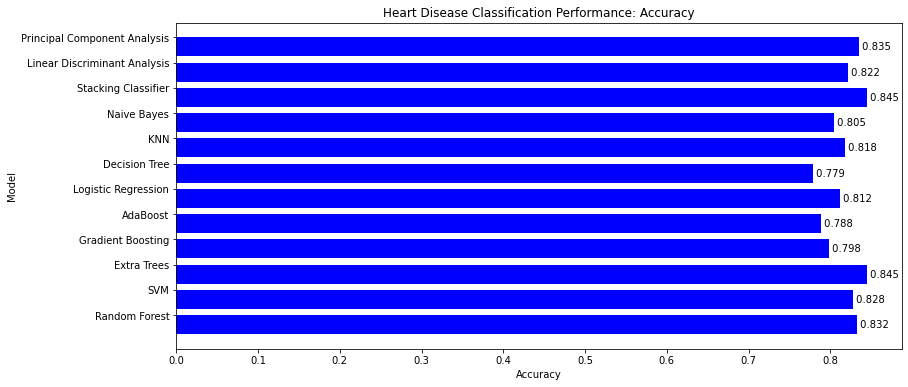

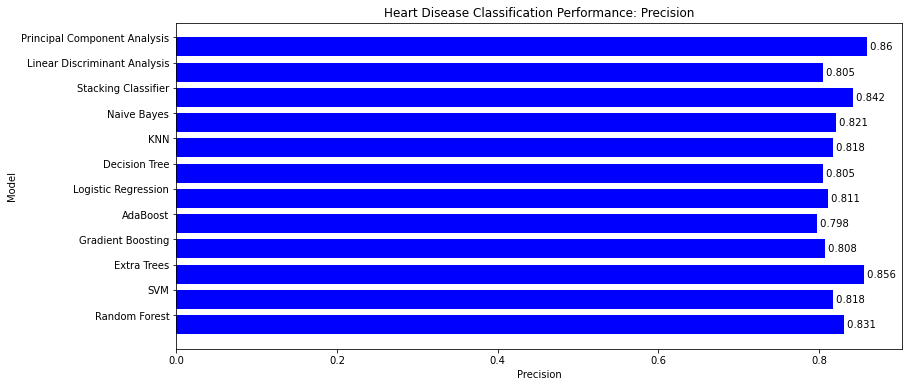

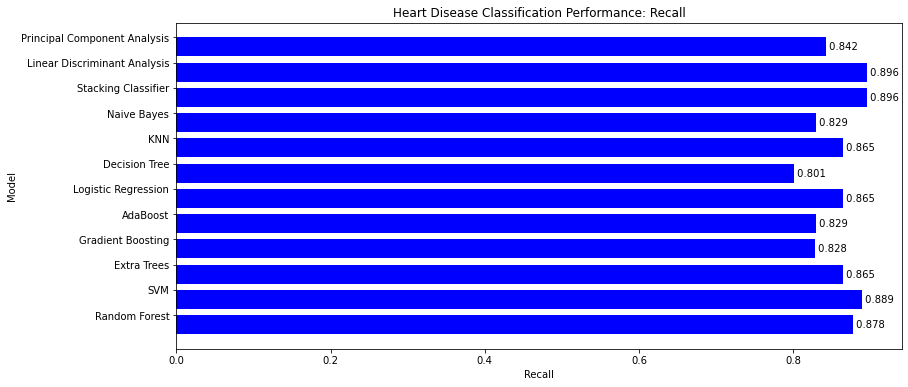

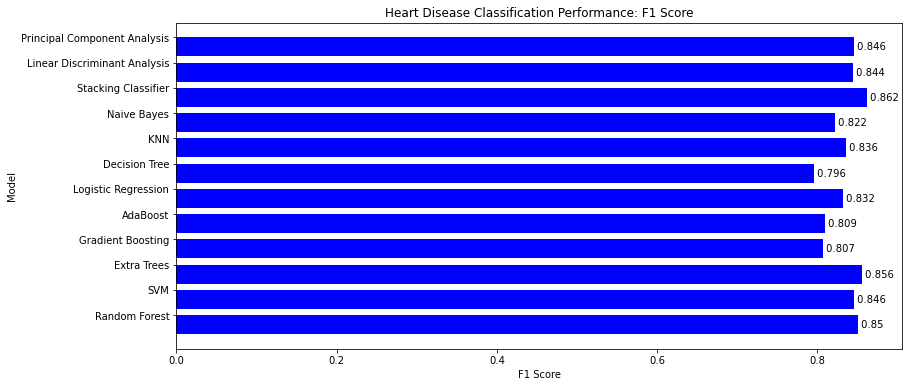

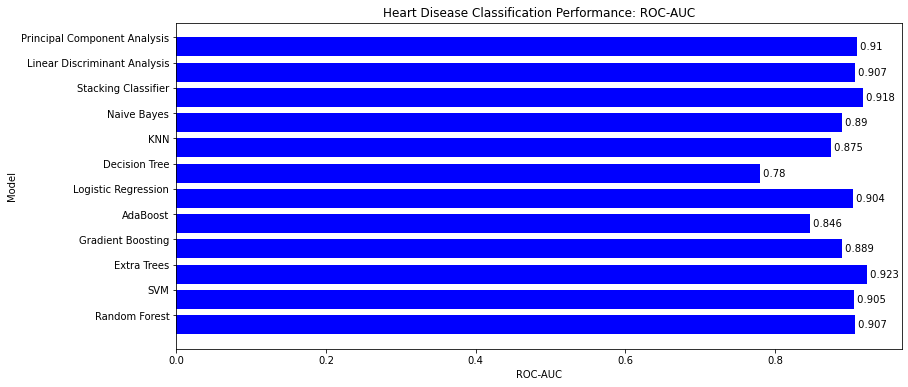

In [61]:
plot_performances(acc.keys(), acc.values(),"Accuracy", "Accuracy")
plot_performances(pre.keys(), pre.values(),"Precision", "Precision")
plot_performances(rec.keys(), rec.values(),"Recall", "Recall")
plot_performances(fs.keys(), fs.values(),"F1 Score", "F1 Score")
plot_performances(auc.keys(), auc.values(),"ROC-AUC", "ROC-AUC")